In [1]:
from sklearn import datasets

In [2]:
import pandas as pd
import numpy as np

In [3]:
housing = datasets.fetch_california_housing()

In [4]:
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)

In [5]:
df_housing["targets"] = pd.Series(housing.target)

In [6]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
targets       20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
housing.feature_names


['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

<module 'matplotlib.figure' from '/home/moshiur/anaconda3/envs/tflow/lib/python3.6/site-packages/matplotlib/figure.py'>

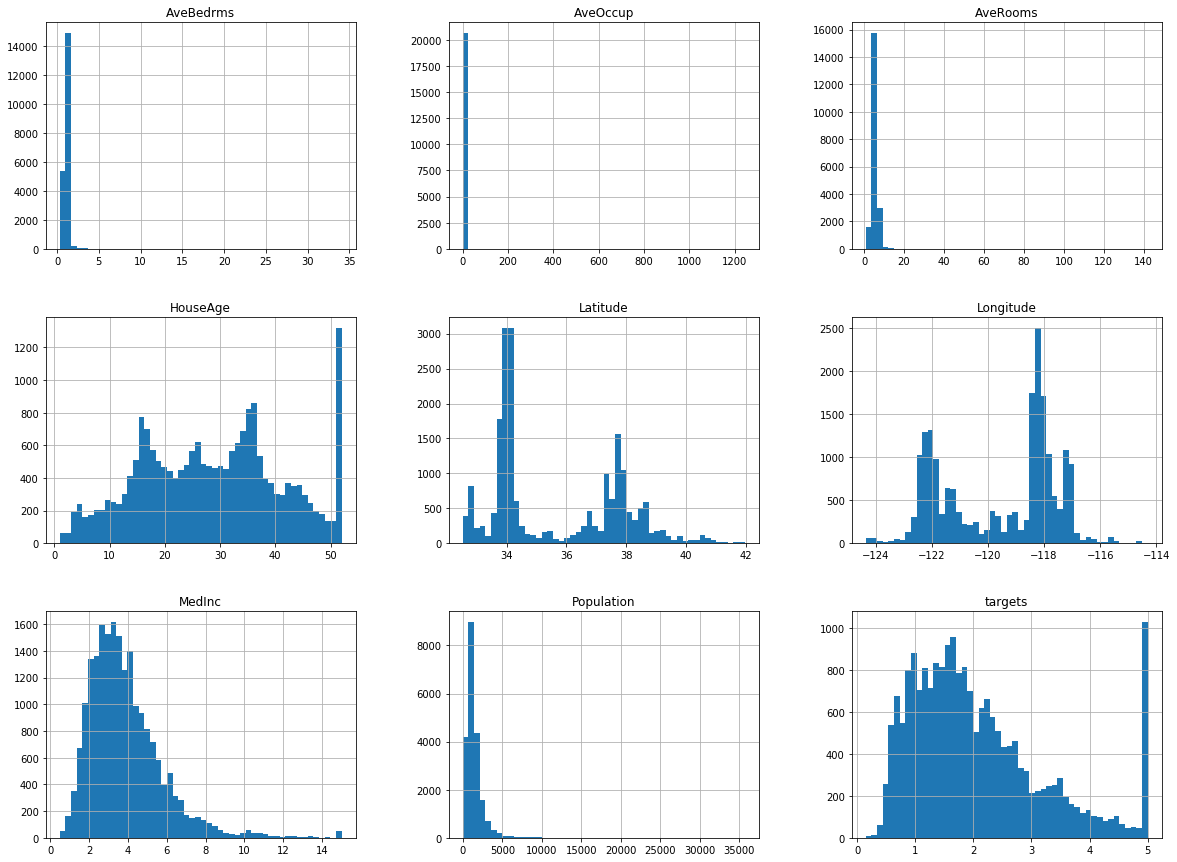

In [8]:
%matplotlib inline
import matplotlib as plt
df_housing.hist(bins=50, figsize=(20,15))
plt.figure

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_housing, test_size=0.2, random_state=42)

In [10]:
test_set.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,targets
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000


In [11]:
housing_train = train_set.copy()

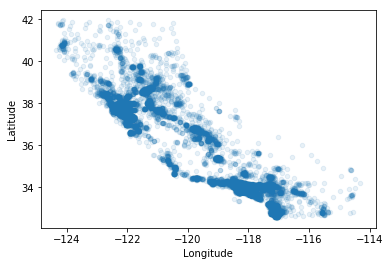

In [12]:
housing_train.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1)

In [13]:
corr_matrix = housing_train.corr()

In [14]:
corr_matrix["targets"].sort_values(ascending=False)

targets       1.000000
MedInc        0.690647
AveRooms      0.158485
HouseAge      0.103706
AveOccup     -0.022030
Population   -0.026032
Longitude    -0.046349
AveBedrms    -0.051351
Latitude     -0.142983
Name: targets, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3170d57d68>,
      dtype=object)

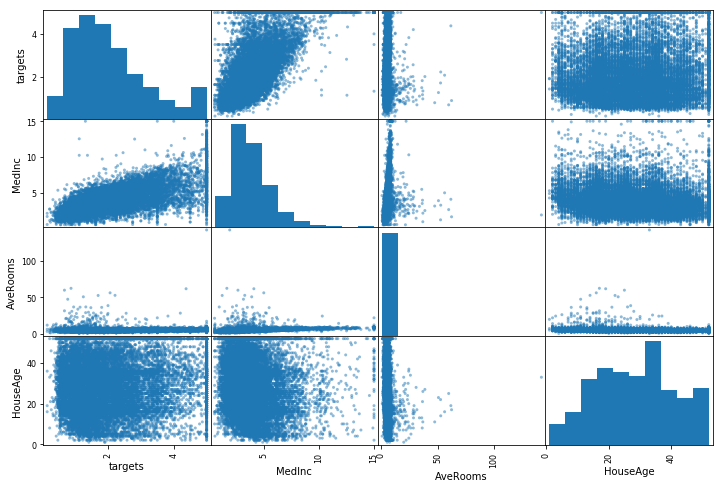

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["targets", "MedInc", "AveRooms", "HouseAge"]
scatter_matrix(housing_train[attributes], figsize=(12, 8))

In [16]:
housing_train = train_set.drop("targets", axis=1)
housing_train_labels = train_set["targets"].copy()

In [17]:
housing_train_incomplete_row = housing_train[housing_train.isnull().any(axis=1)].head()

In [18]:
housing_train_incomplete_row

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler
num_pipeline = Pipeline([('std_scaler', StandardScaler()),])
housing_train_scaled = num_pipeline.fit_transform(housing_train)

In [34]:
housing_train_scaled.shape

(16512, 8)

In [35]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_train_scaled, housing_train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
prediction_data = housing_train_scaled[:5]
label_data = housing_train_labels[:5]

In [37]:
print ("Predictions", lin_reg.predict(prediction_data))

Predictions [1.93725845 2.48910616 2.64735483 1.56589492 1.61312839]


In [38]:
label_data

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
Name: targets, dtype: float64

In [39]:
from sklearn.metrics import mean_squared_error
housing_train_predictions = lin_reg.predict(housing_train_scaled)
lin_mse = mean_squared_error(housing_train_labels, housing_train_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mse

0.5179331255246699

In [40]:
import tensorflow as tf

In [42]:
m, n = housing.data.shape

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

In [51]:
n_epochs = 1000
learning_rate = 0.1

In [49]:
X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed = 42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

In [52]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize (mse)

In [53]:
init = tf.global_variables_initializer()

In [54]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE = ", mse.eval())
        sess.run(training_op)
    best_theta = theta.eval()

Epoch 0 MSE =  2.7544262
Epoch 100 MSE =  0.5279283
Epoch 200 MSE =  0.5244984
Epoch 300 MSE =  0.52433455
Epoch 400 MSE =  0.5243225
Epoch 500 MSE =  0.52432096
Epoch 600 MSE =  0.52432114
Epoch 700 MSE =  0.5243209
Epoch 800 MSE =  0.524321
Epoch 900 MSE =  0.5243211


In [56]:
pwd


'/home/moshiur/Research/Machine_Learning/ml_AG'